# Portfolio simulation
#### using Geometric Brownian Motion (GBM) model
P. Glasserman, Monte Carlo methods in financial engineering. Vol. 53 (2013), Springer Science & Business Media.

Generate correlation of brownian motion to simulate economic scenarios.

In [1]:
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
# Asset Path
import numpy as np

def GBMsimulator(seed, So, mu, sigma, Cov, T, N):
    """
    Parameters
    seed:   seed of simulation
    So:     initial stocks' price
    mu:     expected return
    sigma:  volatility
    Cov:    covariance matrix
    T:      time period
    N:      number of increments
    """

    np.random.seed(seed)
    dim = np.size(So)
    t = np.linspace(0., T, int(N))
    A = np.linalg.cholesky(Cov)
    S = np.zeros([dim, int(N)])
    S[:, 0] = So
    for i in range(1, int(N)):    
        drift = (mu - 0.5 * sigma**2) * (t[i] - t[i-1])
        Z = np.random.normal(0., 1., dim)
        diffusion = np.matmul(A, Z) * (np.sqrt(t[i] - t[i-1]))
        S[:, i] = S[:, i-1]*np.exp(drift + diffusion)
    return S, t

In [3]:
from datetime import datetime

intc = pdr.get_data_yahoo('INTC', start=datetime(2018, 1, 1), end=datetime(2020, 1, 1))
amd = pdr.get_data_yahoo('AMD', start=datetime(2018, 1, 1), end=datetime(2020, 1, 1))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


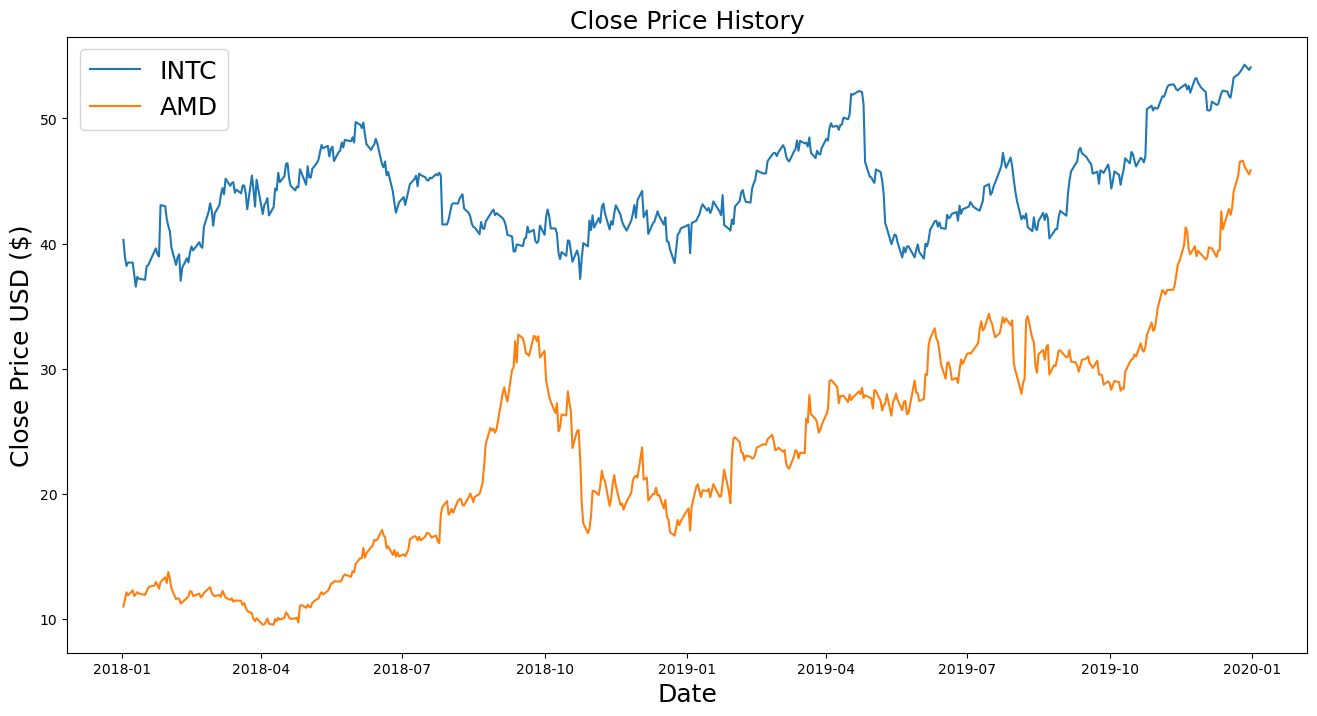

In [4]:
#Visualize the closing price history
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.title('Close Price History', fontsize = 18)
plt.plot(intc['Adj Close'])
plt.plot(amd['Adj Close'])
plt.legend(['INTC', 'AMD'], loc = 'upper left', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

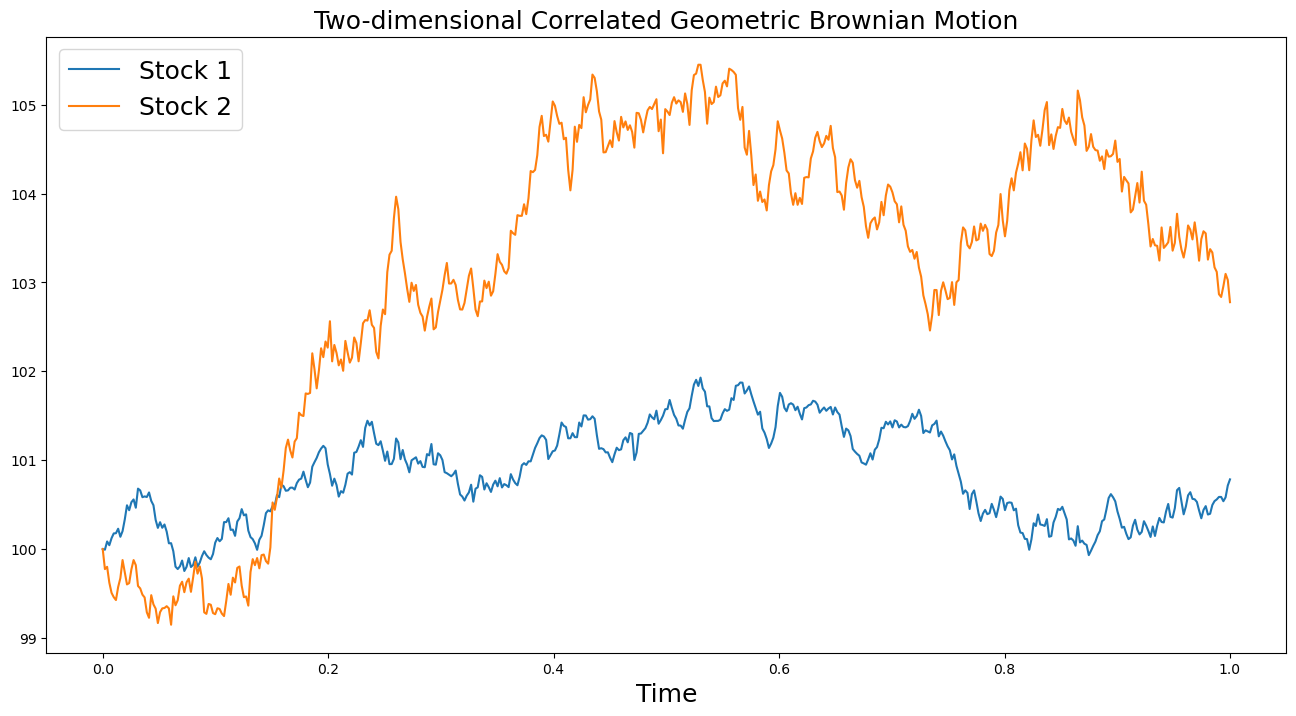

In [5]:
# Two-dimensional Case
seed = 22                       
dim = 2; T = 1; N = int(2.**9)
S0 = np.array([100, 100])
# Parameter Estimation
# logarithmic returns
intc['log_returns'] = np.log(intc['Adj Close']).diff()
amd['log_returns'] = np.log(amd['Adj Close']).diff()
# expected returns
mean_intc = intc['log_returns'][1:].mean()
mean_amd = amd['log_returns'][1:].mean()
mu = [mean_intc, mean_amd]
# volatility
std_intc = intc['log_returns'][1:].std()
std_amd = amd['log_returns'][1:].std()
sigma = np.array([std_intc, std_amd])
# covariance matrix
Cov = np.cov(intc['log_returns'][1:], amd['log_returns'][1:] )
stocks, time = GBMsimulator(seed, S0, mu, sigma, Cov, T, N)
# Visualize Simulation
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.title('Two-dimensional Correlated Geometric Brownian Motion', fontsize = 18)
plt.plot(time, stocks[0,:], label='Stock 1')
plt.plot(time, stocks[1,:], label='Stock 2')

plt.xlabel('Time', fontsize = 18)
plt.legend(['Stock 1', 'Stock 2'], loc = 'upper left', fontsize = 18)
plt.show()

Cholesky decomposition

array([[ 1.        , -0.97185189],
       [-0.97185189,  1.        ]])

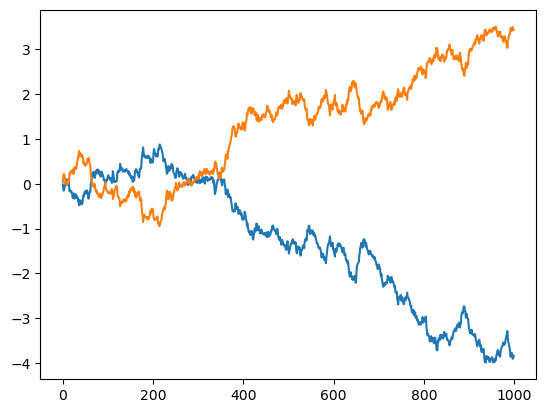

In [6]:
# Correlation coefficient
rho = -.9

# Correlation matrix
C = np.array([[1, rho], [rho, 1]])
# L is the lower triangular matrix, L.T is the upper triangular matrix
L = np.linalg.cholesky(C)
# Time step (daily)
dt = 1/252

# 2 Brownian motions with 1000 steps
X = np.random.normal(0, (dt**(1/2)), (2, 1000))
# Find the correlated paths
CX = np.dot(L, X)

# Plot the correlated paths
for path in CX:
    plt.plot(path.cumsum())
    
# Print the correlation matrix
np.corrcoef(CX.cumsum(axis=1))

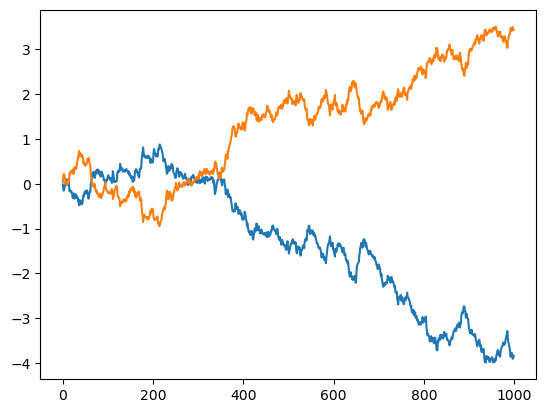

In [7]:
# Use the second process in X as the Z process
Zt = X[1]

# Use the first process in X as the W1 process
Wt1 = X[0]

# Satisfy the equation to generate the W2 process
Wt2 = rho*Wt1 + np.sqrt(1-(rho**2))*Zt

# Plot the two processes
plt.plot(Wt1.cumsum())
plt.plot(Wt2.cumsum())

https://isquared.digital/blog/2020-05-01-drifted-brownian-motion/

2023-03-15 11:55:22.912 | INFO     | src.data.dataset:read_data:141 - reading zero curve data from ESW.


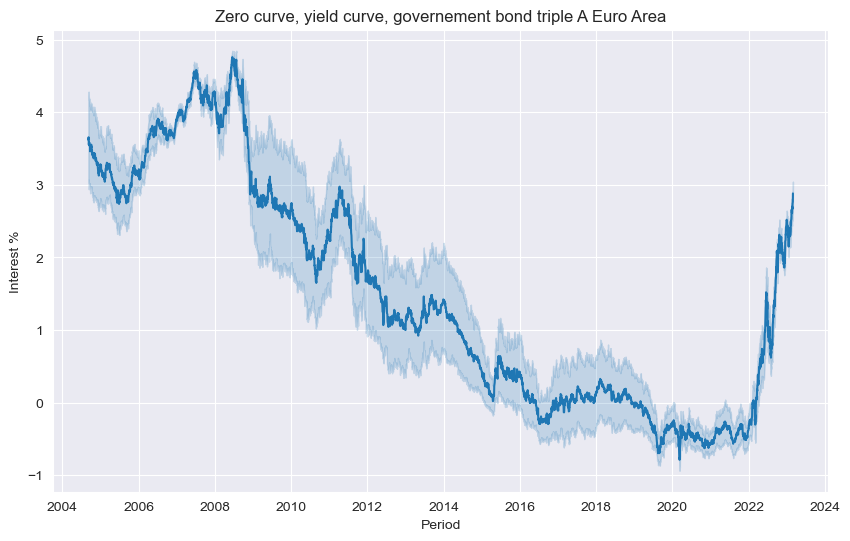

In [8]:
from src.data import dataset
zerocurve = dataset.Zerocurve()
zerocurve.load_data()
zerocurve.lineplot()

In [18]:
zerocurve.df.pivot(columns = 'tenor', values = 'rate')

tenor,1 Year,10 Years,15 Months,15 Years,18 Months,2 Years,3 Months,3 Years,30 Years,4 Years,5 Years,6 Months,7 Years,9 Months,ON
rate_dt,,,,,,,,,,,,,,,
2004-09-06,2.651565,5.217850,2.822715,5.367339,2.988139,3.298175,2.121240,3.825284,5.410036,4.232494,4.538927,2.298449,4.934807,2.476137,2.121240
2004-09-07,2.700174,5.193965,2.872345,5.346548,3.036262,3.338711,2.139612,3.844763,5.391362,4.233661,4.527671,2.332966,4.912476,2.520157,2.139612
2004-09-08,2.731688,5.195932,2.906993,5.343014,3.072722,3.375993,2.149441,3.877788,5.385502,4.259989,4.547567,2.352607,4.922632,2.546828,2.149441
2004-09-09,2.662770,5.158222,2.829146,5.324286,2.988434,3.284360,2.129304,3.784690,5.376611,4.173438,4.470124,2.311673,4.863580,2.489955,2.129304
2004-09-10,2.593700,5.136517,2.754329,5.302756,2.911134,3.208441,2.110625,3.722313,5.355005,4.125765,4.433397,2.268949,4.837977,2.431078,2.110625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,2.937054,2.600728,2.774903,2.552547,2.642319,2.479086,2.978537,2.404607,2.084580,2.439608,2.487017,3.178055,2.558347,3.099154,2.978537
2023-02-23,2.918201,2.571125,2.731899,2.518990,2.586969,2.419994,3.049652,2.359113,2.050232,2.402910,2.454270,3.238725,2.528621,3.117648,3.049652
2023-02-24,3.087703,2.560305,2.924748,2.517924,2.780437,2.580853,3.045115,2.444523,2.115453,2.447321,2.477391,3.279834,2.529558,3.234152,3.045115


#### Decomposition and predicting euro yield curves using Pricipal Component Analysis
https://towardsdatascience.com/decomposing-predicting-the-euro-yield-curve-b3ad1670fdbb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

